In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.arima_model import ARMA
from fbprophet.plot import plot_cross_validation_metric
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("C:/Users/haris/Downloads/project-p63/DEXINUS.xlsx", skiprows = range(0,10))
data

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [4]:
# Renaming the columns to ease the use
data = data.rename({'observation_date': 'Date', 'DEXINUS': 'Rate'}, axis=1)
data['Date'] = pd.to_datetime(data.Date)
data

,Date,Rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12649 non-null  datetime64[ns]
 1   Rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [6]:
data.isnull().sum()

Date      0
Rate    494
dtype: int64

In [7]:
# Imputing the null values of the Rate column

data['Rate'] = data['Rate'].fillna(value= 0.0)

for i in range(0, len(data['Rate'])):
    if data.Rate[i] == 0.0:
        data.Rate[i] = (data.Rate[i-1] + data.Rate[i-2])/2.0
data

,Date,Rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [8]:
data.isnull().sum()

Date    0
Rate    0
dtype: int64

In [9]:
data.describe()

,Rate
count,12649.000000
mean,34.207159
std,21.113576
min,7.190000
25%,12.070000
50%,35.890000
75%,47.660000
max,76.950000


In [10]:
df = data.copy()
data_fbmodel = data.copy()
df.set_index('Date',inplace = True)
df

,Rate
Date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


In [11]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data

,Date,Rate,Year,Month
0,1973-01-02,8.02,1973,1
1,1973-01-03,8.02,1973,1
2,1973-01-04,8.00,1973,1
3,1973-01-05,8.01,1973,1
4,1973-01-08,8.00,1973,1
...,...,...,...,...
12644,2021-06-21,74.18,2021,6
12645,2021-06-22,74.37,2021,6
12646,2021-06-23,74.13,2021,6
12647,2021-06-24,74.14,2021,6


In [12]:
test = data.copy()
test.set_index('Date',inplace = True)
test

,Rate,Year,Month
Date,,,
1973-01-02,8.02,1973,1
1973-01-03,8.02,1973,1
1973-01-04,8.00,1973,1
1973-01-05,8.01,1973,1
1973-01-08,8.00,1973,1
...,...,...,...
2021-06-21,74.18,2021,6
2021-06-22,74.37,2021,6
2021-06-23,74.13,2021,6


# Data Visualization

### Lineplot

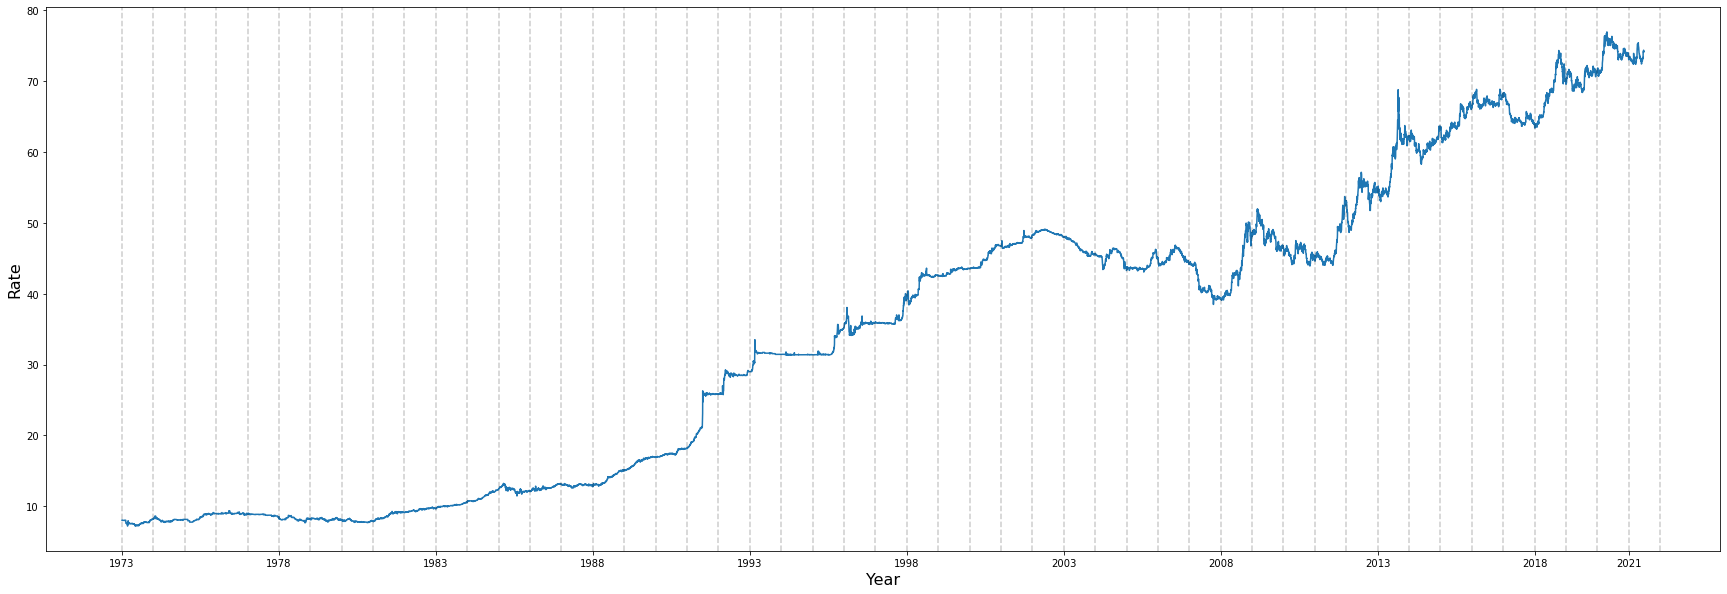

In [12]:
from ipynb.fs.full.Showgraph import * # pip install ipynb
Plot_Series(df)

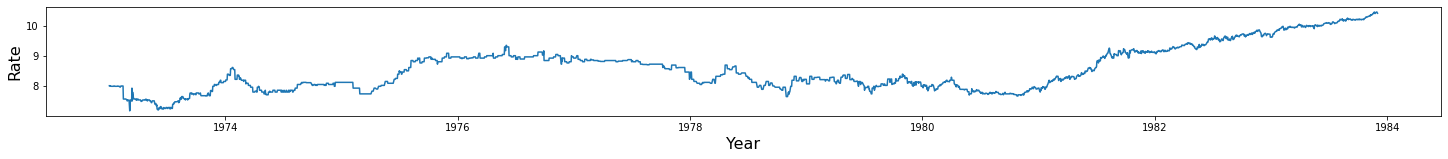

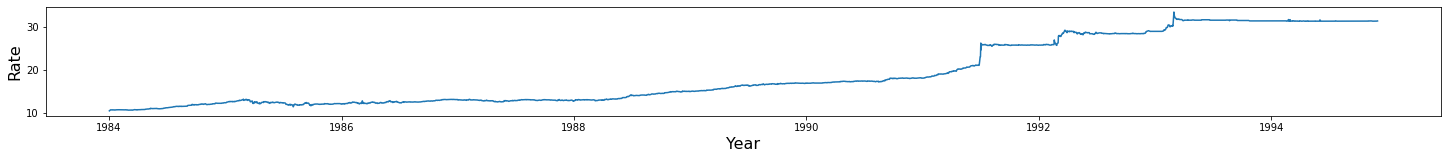

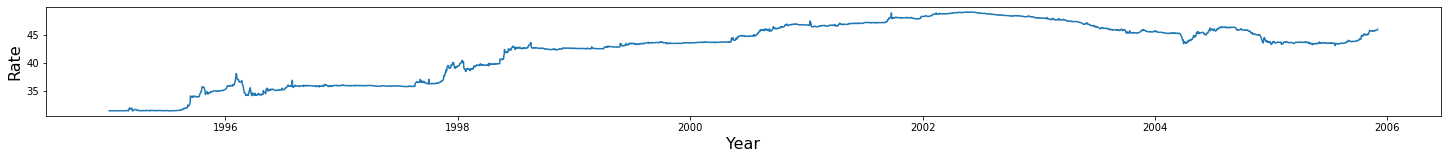

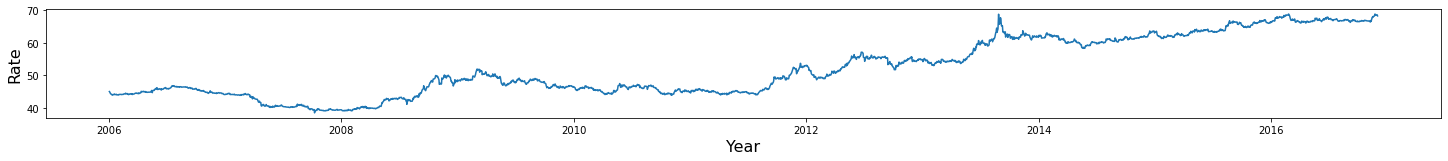

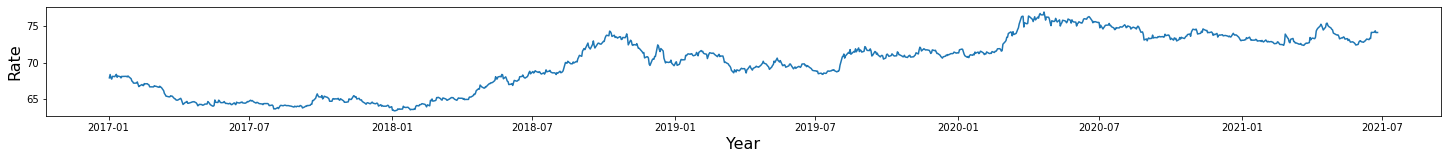

In [13]:
# Visualizing data at 10-year interval
drange1 = df.loc["1973-01-02": "1983-12-01"]
Sub_Lineplot(drange1)
drange2 = df.loc["1984-01-01": "1994-12-01"]
Sub_Lineplot(drange2)
drange3 = df.loc["1995-01-01": "2005-12-01"]
Sub_Lineplot(drange3)
drange4 = df.loc["2006-01-01": "2016-12-01"]
Sub_Lineplot(drange4)
drange5 = df.loc["2017-01-01": "2021-06-25"]
Sub_Lineplot(drange5)

### Boxplot

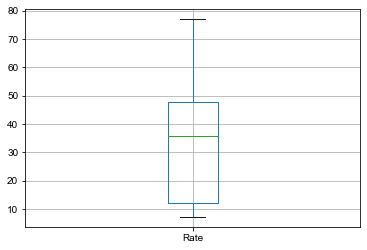

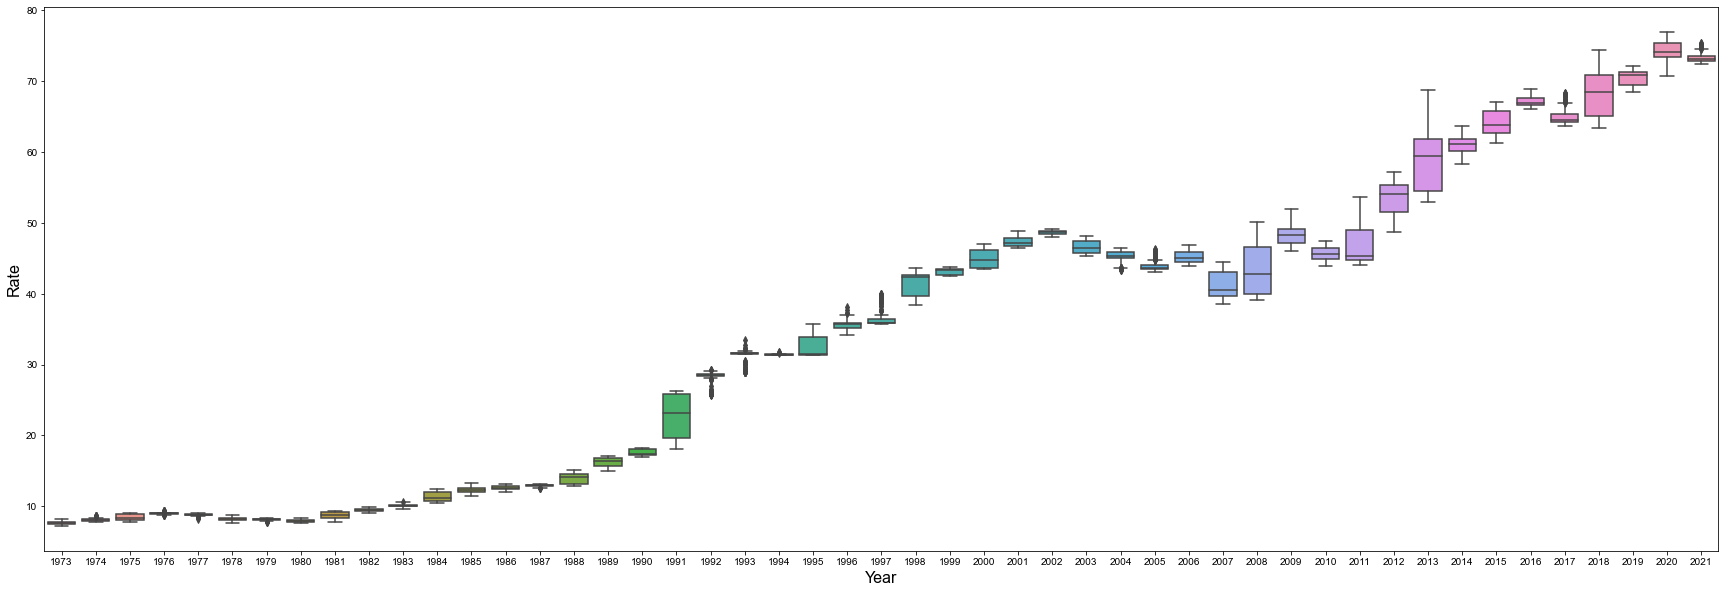

In [14]:
Box_Plot1(data) #Entire Data
Box_Plot2(data) #Group by Year

In [15]:
data.set_index('Date',inplace = True)

### Histogram

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

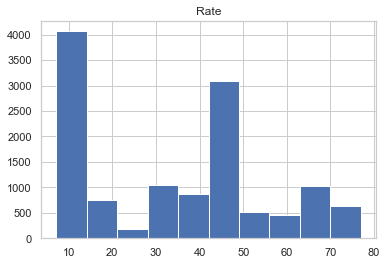

In [16]:
df.hist()

### Distplot

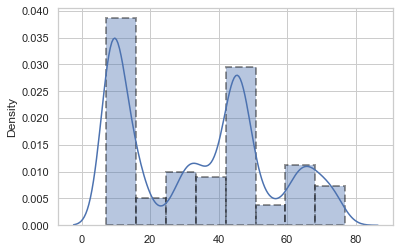

In [17]:
Dist_Plot(df)

### Lag Plot

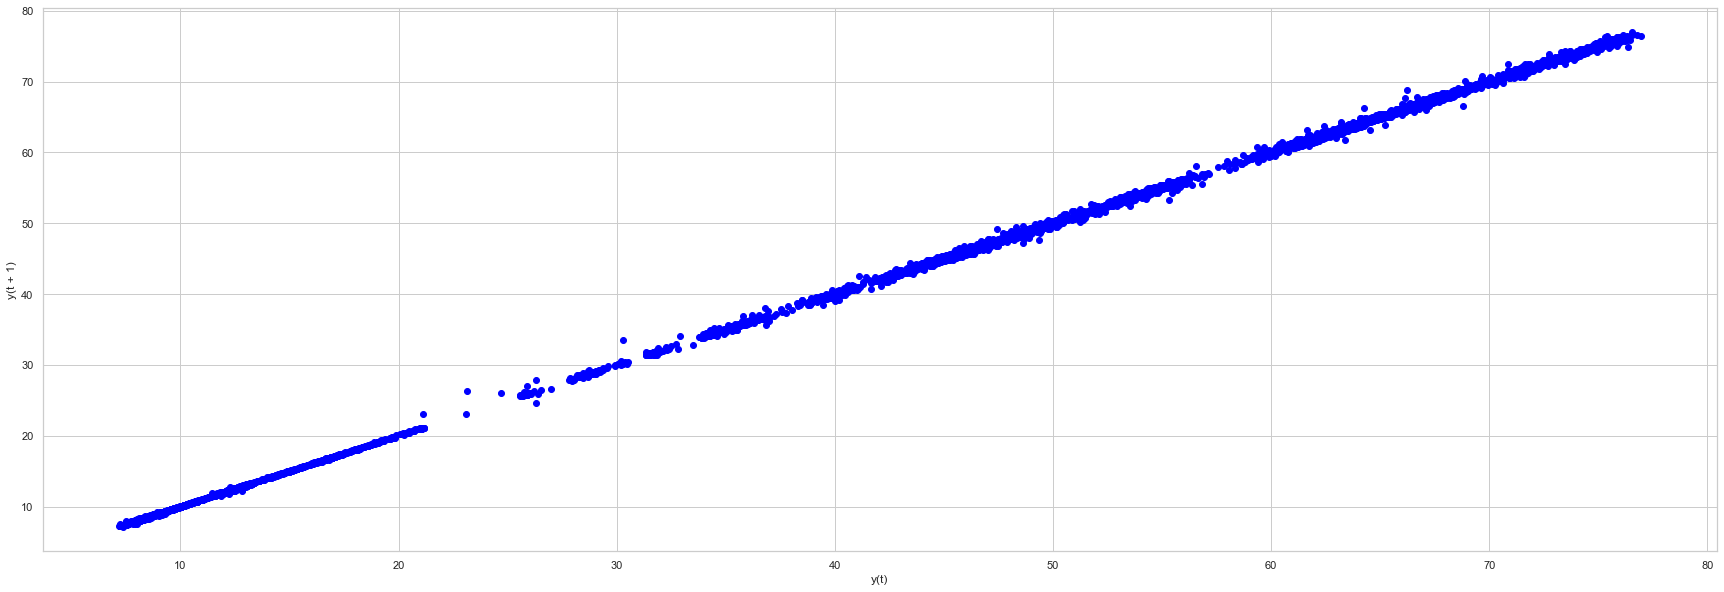

In [18]:
Lag_Plot(df)

In [19]:
# Checking the correlation between t-1 and t+1 values
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999965
t+1  0.999965  1.000000


##### This confirms that there exists a strong correlation between the observed lags as shown in the above lag_plot()




### ACF plots and PACF plots

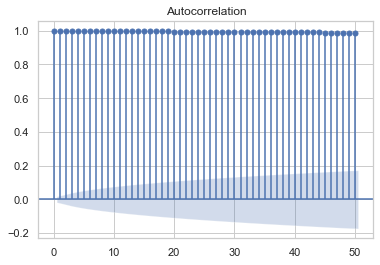

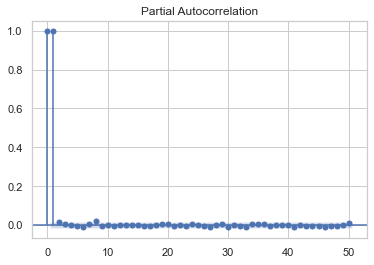

In [20]:
ACF_PACF_Plots(df)

#### Based on decaying ACF, we are likely dealing with an Auto Regressive process
#### Based on PACF, we should start with an Auto Regressive model with 2 lags only

## Time series decomposition plot

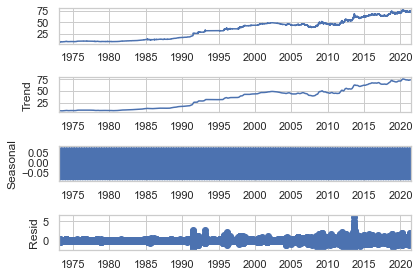

In [21]:
Decompose(df)

### Auto Regression (AR)

# Testing if Data is Stationary

In [22]:
import cv2
import sys
sys.path.append('/home/osboxes/miniconda2/lib/python2.7/site-packages')


In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Augmented Dickey Fuller Test for Stationarity
from ipynb.fs.full.Tests import *

ModuleNotFoundError: No module named 'ipynb'

In [23]:
adfuller_test(data['Rate'])

ADF Test Statistic : 0.6370392475286439
p-value : 0.9884938782329391
#Lags Used : 37
Number of Observations used : 12611
Accept the null hypothesis(Ho). Data is non-stationary


# Normalize

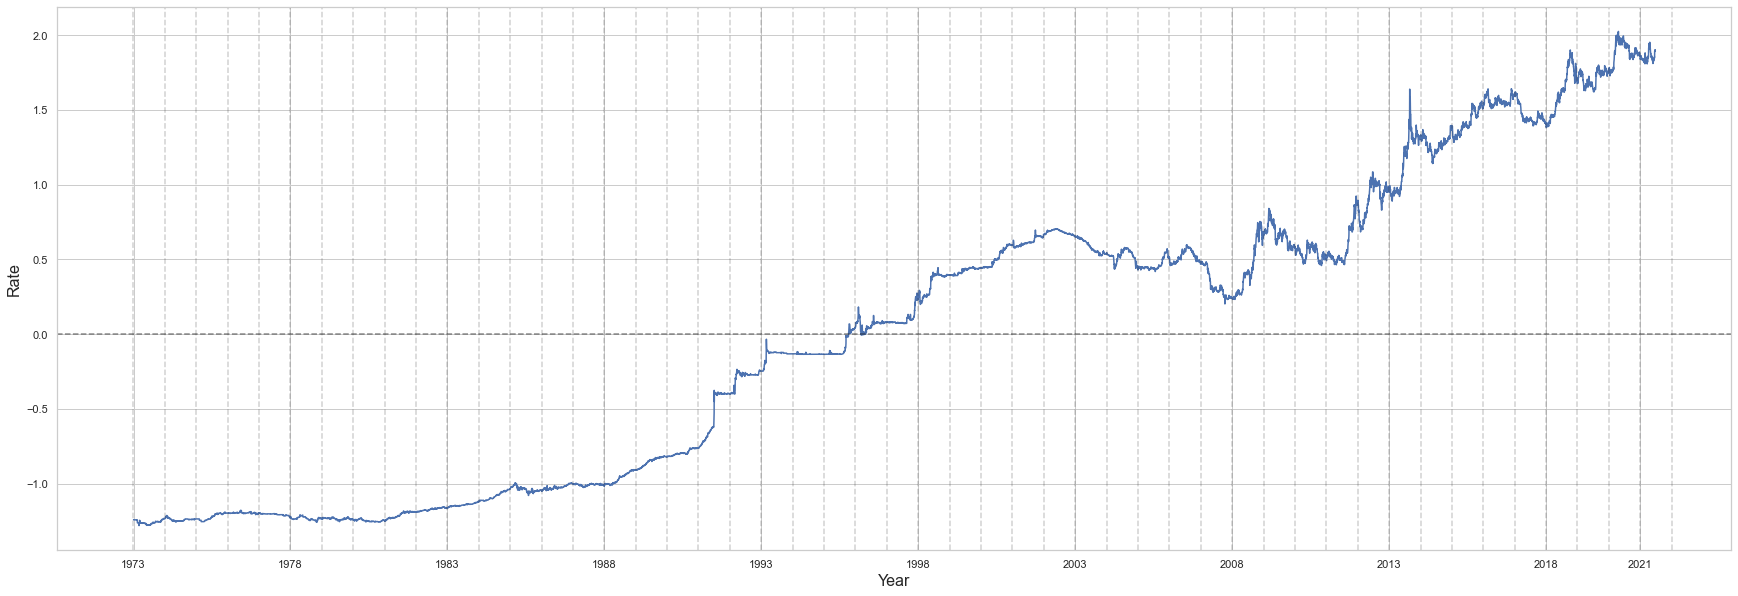

In [24]:
avg, dev = test.mean(), test.std()
test = (test - avg) / dev

Plot_Series(test.Rate)
plt.axhline(0, linestyle='--', color='k', alpha=0.5)

# Removing Trend

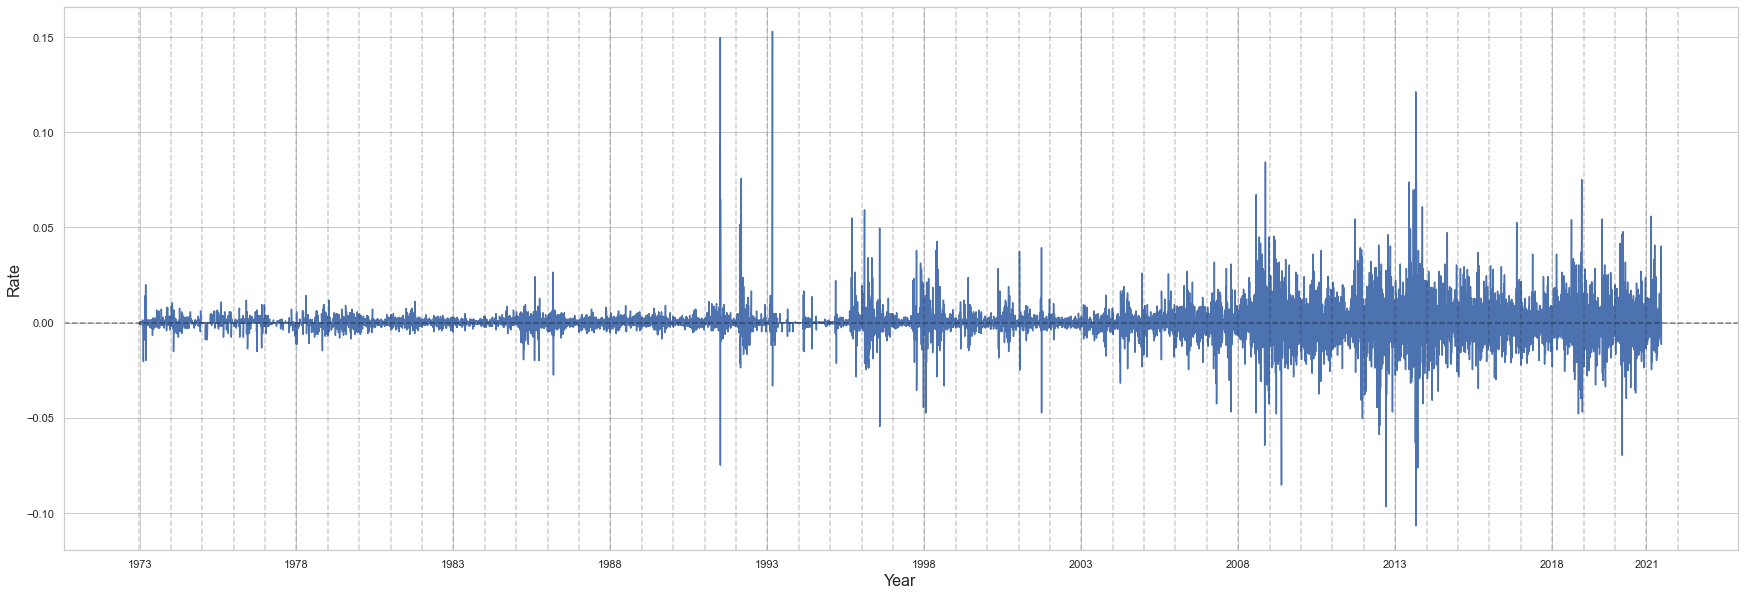

In [25]:
# Take First Difference to Remove Trend

first_diffs = data.Rate.values[1:] - data.Rate.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])



test = test.diff().dropna()
Plot_Series(test.Rate)
plt.axhline(0, linestyle='--', color='k', alpha=0.5)

In [26]:
#set first difference as variable in dataframe
data['FirstDifference'] = first_diffs
data

,Rate,Year,Month,FirstDifference
Date,,,,
1973-01-02,8.02,1973,1,0.00
1973-01-03,8.02,1973,1,-0.02
1973-01-04,8.00,1973,1,0.01
1973-01-05,8.01,1973,1,-0.01
1973-01-08,8.00,1973,1,0.00
...,...,...,...,...
2021-06-21,74.18,2021,6,0.19
2021-06-22,74.37,2021,6,-0.24
2021-06-23,74.13,2021,6,0.01


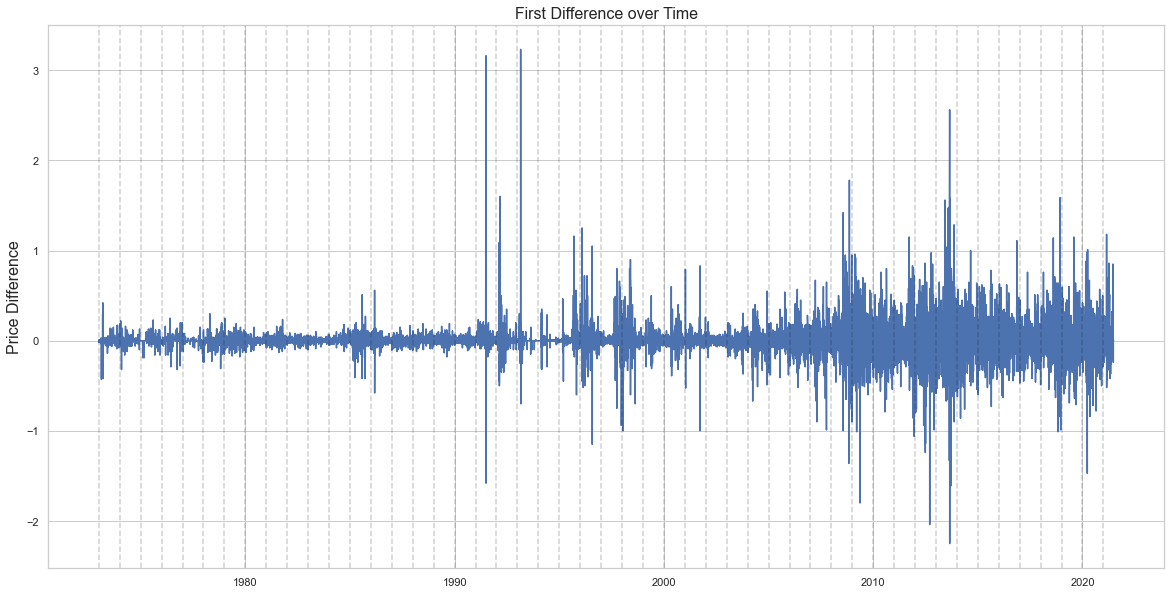

In [27]:
plt.figure(figsize=(20,10))
plt.plot(data.FirstDifference)
plt.title('First Difference over Time', fontsize=16)
plt.ylabel('Price Difference', fontsize=16)
for year in range(1973,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Remove Increasing Volatility

In [28]:
annual_volatility = test.Rate.groupby(test.index.year).std()

In [29]:
annual_volatility

Date
1973    0.003099
1974    0.002066
1975    0.001852
1976    0.002433
1977    0.001270
1978    0.002591
1979    0.002419
1980    0.001505
1981    0.002059
1982    0.001441
1983    0.001062
1984    0.001530
1985    0.004470
1986    0.003371
1987    0.002051
1988    0.002092
1989    0.002116
1990    0.001678
1991    0.012781
1992    0.007492
1993    0.010170
1994    0.002435
1995    0.006074
1996    0.009378
1997    0.006857
1998    0.007947
1999    0.003465
2000    0.004536
2001    0.005525
2002    0.001749
2003    0.003431
2004    0.006438
2005    0.004707
2006    0.006407
2007    0.008656
2008    0.015281
2009    0.013886
2010    0.010971
2011    0.011959
2012    0.016478
2013    0.023154
2014    0.011509
2015    0.010917
2016    0.010023
2017    0.008067
2018    0.013745
2019    0.011852
2020    0.013524
2021    0.011547
Name: Rate, dtype: float64

In [30]:
annual_vol = test.Rate.index.map(lambda d: annual_volatility.loc[d.year])

In [31]:
annual_vol

Float64Index([0.003098591833372511, 0.003098591833372511, 0.003098591833372511,
              0.003098591833372511, 0.003098591833372511, 0.003098591833372511,
              0.003098591833372511, 0.003098591833372511, 0.003098591833372511,
              0.003098591833372511,
              ...
              0.011546702235069229, 0.011546702235069229, 0.011546702235069229,
              0.011546702235069229, 0.011546702235069229, 0.011546702235069229,
              0.011546702235069229, 0.011546702235069229, 0.011546702235069229,
              0.011546702235069229],
             dtype='float64', name='Date', length=12648)

In [32]:
test['Rate'] = test['Rate']/annual_vol
test

,Rate,Year,Month
Date,,,
1973-01-03,0.000000,0.0,0.0
1973-01-04,-0.305706,0.0,0.0
1973-01-05,0.152853,0.0,0.0
1973-01-08,-0.152853,0.0,0.0
1973-01-09,0.000000,0.0,0.0
...,...,...,...
2021-06-21,0.164074,0.0,0.0
2021-06-22,0.779352,0.0,0.0
2021-06-23,-0.984445,0.0,0.0


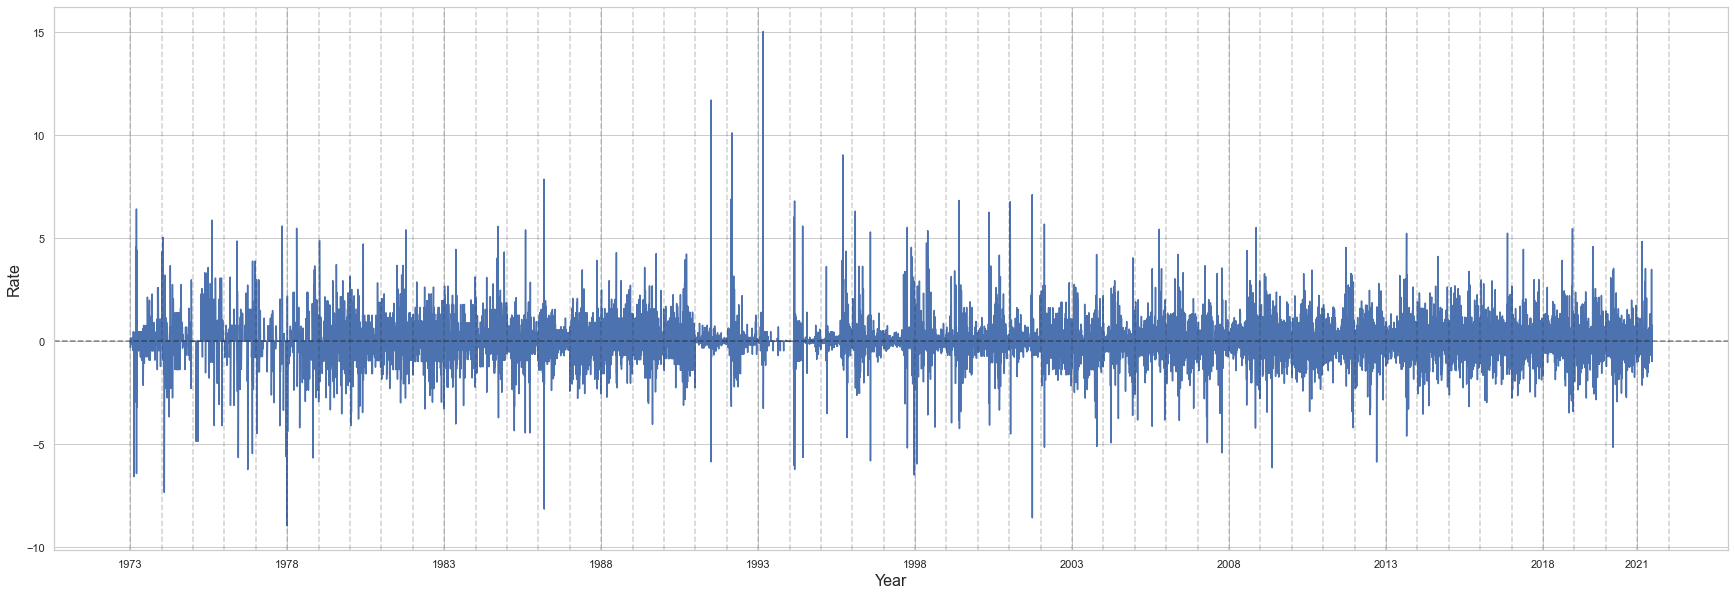

In [33]:
Plot_Series(test.Rate)
plt.axhline(0, linestyle='--', color='k', alpha=0.5)

### ACF and PACF Plots on First Difference data

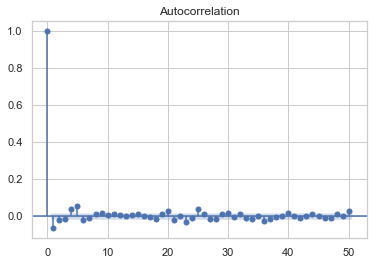

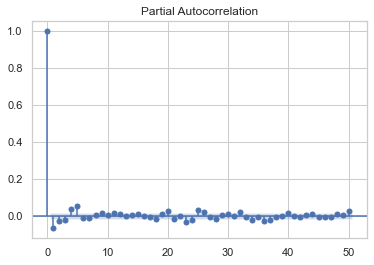

In [34]:
ACF_PACF_Plots(data.FirstDifference)

# Testing if First Difference Data is Stationary

In [35]:
adfuller_test(df['Rate'])

ADF Test Statistic : 0.6370392475286439
p-value : 0.9884938782329391
#Lags Used : 37
Number of Observations used : 12611
Accept the null hypothesis(Ho). Data is non-stationary


# Model Building

## Auto Regressive Model 
## 1. AR Model

### yt = c + ϕ1.yt−1 + ϕ2.yt−2 + εt

In [36]:
from ipynb.fs.full.Models import *

Model fitting time: 0.007284879684448242
Coefficients: [0.00387901 0.9333923  0.06665569]
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                12618
Model:                     AutoReg(2)   Log Likelihood                3970.996
Method:               Conditional MLE   S.D. of innovations              0.177
Date:                Thu, 12 Aug 2021   AIC                             -3.467
Time:                        23:47:02   BIC                             -3.464
Sample:                             2   HQIC                            -3.466
                                12618                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.003      1.295      0.195      -0.002       0.010
y.L1           0.9334      0.009    105.0

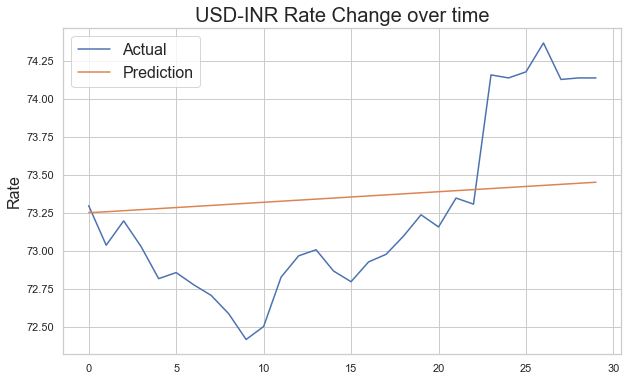

In [37]:
AR_Model(df)

## 2. ARMA Model

In [38]:
#Considering data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2021-06-25')
data_ARMA = data[start_date:]

### So the ARMA(2,2) model is:

Model fitting time: 0.7443385124206543
Coefficients: [60.27253878  1.54649046 -1.29098215  0.74421021 -0.58273147  0.6891899 ]
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2965
Model:                     ARMA(3, 2)   Log Likelihood                -455.622
Method:                       css-mle   S.D. of innovations              0.282
Date:                Thu, 12 Aug 2021   AIC                            925.243
Time:                        23:47:03   BIC                            967.206
Sample:                             0   HQIC                           940.346
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2725     10.351      5.823      0.000      39.984      80.561
ar.L

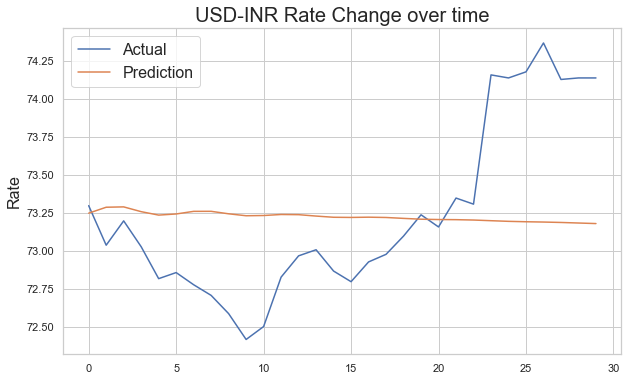

In [39]:
ARMA_Model(data_ARMA)

## ARIMA Model

In [ ]:
def ARIMA_Model(data,p,d,q):
    
    val = data.values
    val = val.astype('float32')
    train, test = val[1:len(val)-30], val[len(val)-30:]
    history = [x for x in train]
    predictions = list()
    
    for i in range(len(test)):
        arima_model = ARIMA(history, order=(p,d,q)).fit()
        output = arima_model.forecast()
        ypred = output[0]
        predictions.append(ypred)
        act = test[i]
        history.append(act)
        print('predicted=%f, expected=%f' % (ypred, act))
       
    # evaluate forecasts
    residuals = test - predictions 
    rmse = np.sqrt(np.mean(residuals**2))
    print('Root Mean Squared Error: %.3f' %rmse)
    mape = np.mean(abs(residuals/test))
    print('Mean Absolute Percentage Error: %.3f' %mape)
    
    #Print summary of the model
    print(arima_model.summary())
    
    # plot forecasts against actual outcomes
    forecast=arima_model.forecast(steps=30,alpha=0.05)[0]
    arima_model.plot_predict()
    arima_model.plot_predict(12619,12649)

predicted=73.253303, expected=73.300003
predicted=73.305758, expected=73.040001
predicted=73.063778, expected=73.199997
predicted=73.199585, expected=73.029999
predicted=73.045809, expected=72.820000
predicted=72.843100, expected=72.860001
predicted=72.867726, expected=72.779999
predicted=72.791782, expected=72.709999
predicted=72.722212, expected=72.589996
predicted=72.605799, expected=72.419998
predicted=72.440254, expected=72.504997
predicted=72.508764, expected=72.830002
predicted=72.812508, expected=72.970001
predicted=72.959453, expected=73.010002
predicted=73.008339, expected=72.870003
predicted=72.883303, expected=72.800003
predicted=72.812637, expected=72.930000
predicted=72.928575, expected=72.980003
predicted=72.980186, expected=73.099998
predicted=73.095784, expected=73.239998
predicted=73.233177, expected=73.160004
predicted=73.167701, expected=73.349998
predicted=73.343050, expected=73.309998
predicted=73.314903, expected=74.160004
predicted=74.106482, expected=74.139999


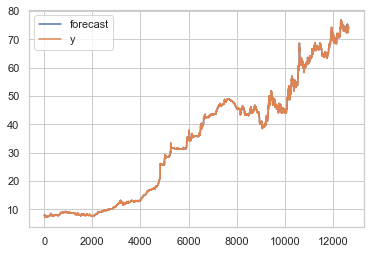

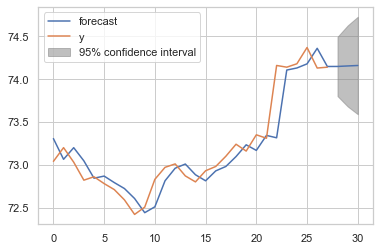

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
ARIMA_Model(df,1,1,1)

## Simple Exponential Method

In [53]:
Simple_Exponential(df)     

Root Mean Squared Error: 0.652
Mean Absolute Percentage Error: 0.008


## Holt Winters Linear Trend Method

In [42]:
Holt_Winters_Linear(df)

Root Mean Squared Error: 1.488
Mean Absolute Percentage Error: 0.017


## FB Prophet Model

In [ ]:
model = FB_Prophet(data_fbmodel)

In [44]:
data_cv = fb_crossval(model)

In [45]:
fig = plot_cross_validation_metric(data_cv, metric='rmse')

# Neural Network Models

## 1. Artificial Neural Network (ANN)

In [54]:
y_test1,y_pred1 = ANN_Model(df)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11918/11918 [==============================] - 4s 309us/step - loss: 1.3307e-05 - rmse: 0.0036
Epoch 2/200
11918/11918 [==============================] - 4s 310us/step - loss: 3.0548e-04 - rmse: 0.0175
Epoch 3/200
11918/11918 [==============================] - 4s 309us/step - loss: 1.2403e-04 - rmse: 0.0111
Epoch 00003: early stopping
The R2 score on the Test set is:	0.901
The Adjusted R2 score on the Test set is:	0.901
Root Mean Squared Error: 0.641


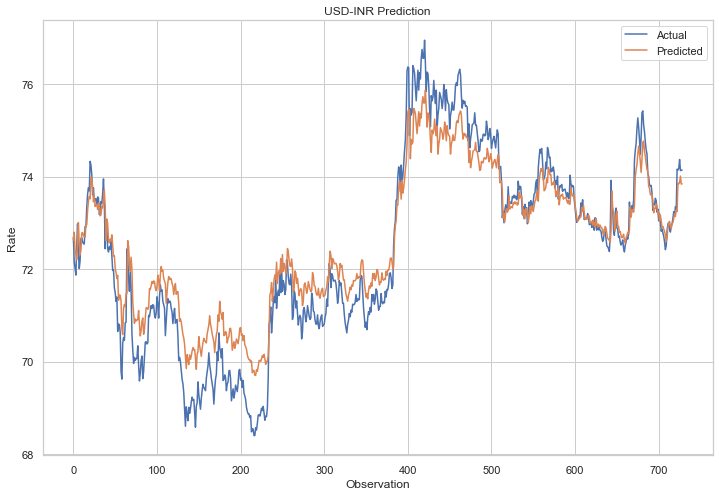

In [55]:
NeuralNet_Plot(y_test1,y_pred1)

## 2. Long Term Short Memory (LSTM Recurrent Neural Network)

In [56]:
y_test2,y_pred2 = LSTM_Model(df)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
11917/11917 [==============================] - 7s 528us/step - loss: 7.5804e-04 - rmse: 0.0275
Epoch 2/5
11917/11917 [==============================] - 6s 526us/step - loss: 2.6887e-05 - rmse: 0.0052
Epoch 3/5
11917/11917 [==============================] - 6s 527us/step - loss: 2.2011e-05 - rmse: 0.0047
Epoch 4/5
11917/11917 [==============================] - 6s 526us/step - loss: 1.9547e-05 - rmse: 0.0044
Epoch 5/5
11917/11917 [==============================] - 6s 527us/step - loss: 1.8464e-05 - rm

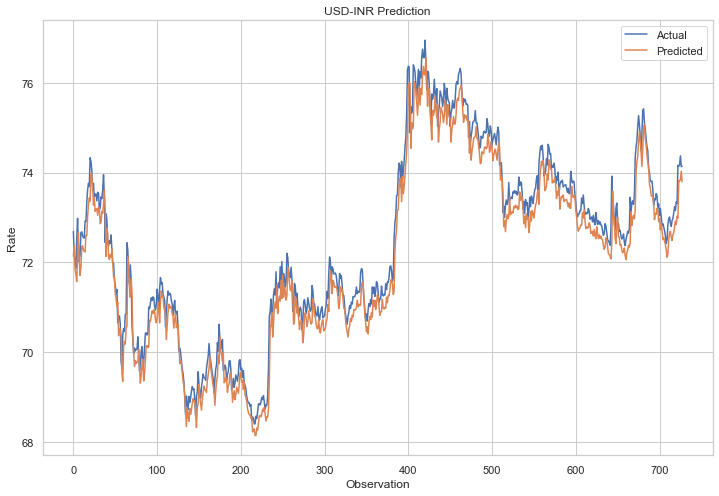

In [57]:
NeuralNet_Plot(y_test2,y_pred2)

## 3. Gated Recurrent Unit(GRU)

In [50]:
y_test3,y_pred3 = GRU_Model(df)

Epoch 1/100
596/596 [==============================] - 1s 588us/step - loss: 1.5173e-05 - rmse: 0.0039
Epoch 2/100
596/596 [==============================] - 0s 590us/step - loss: 6.4057e-05 - rmse: 0.0080
Epoch 3/100
596/596 [==============================] - 0s 583us/step - loss: 2.1020e-05 - rmse: 0.0046
Epoch 4/100
596/596 [==============================] - 0s 589us/step - loss: 1.2372e-05 - rmse: 0.0035
Epoch 5/100
596/596 [==============================] - 0s 614us/step - loss: 1.0690e-05 - rmse: 0.0033
Epoch 6/100
596/596 [==============================] - 0s 602us/step - loss: 1.0427e-05 - rmse: 0.0032
Epoch 7/100
596/596 [==============================] - 0s 599us/step - loss: 1.0633e-05 - rmse: 0.0033
Epoch 8/100
596/596 [==============================] - 0s 598us/step - loss: 1.0993e-05 - rmse: 0.0033
Epoch 9/100
596/596 [==============================] - 0s 596us/step - loss: 1.1241e-05 - rmse: 0.0034
Epoch 10/100
596/596 [==============================] - 0s 590us/step - l

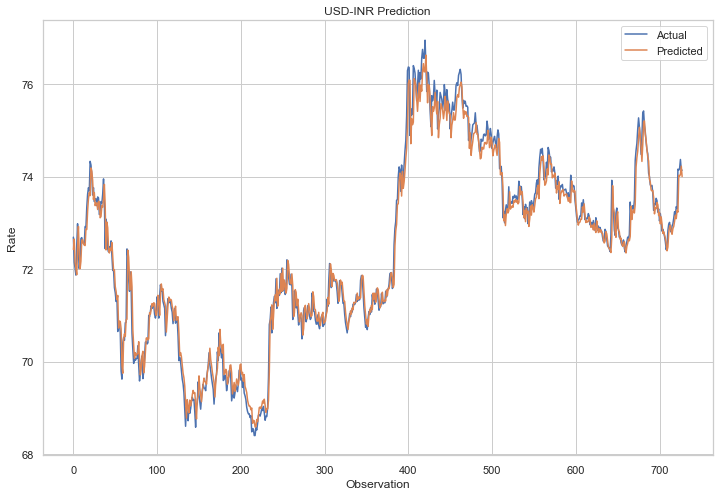

In [51]:
NeuralNet_Plot(y_test3,y_pred3)